In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
import emcee

In [2]:
# Rosenbrock
def loglike(x):
    return -sum(100.0 * (x[1:] - x[:-1] ** 2.0) ** 2.0 + (1 - x[:-1]) ** 2.0)
def transform(x):
    return 5. * x
dims = 10

In [3]:
nwalkers = 32
p0 = np.random.rand(nwalkers, dims)

In [4]:
sampler = emcee.EnsembleSampler(nwalkers, dims, loglike)

In [5]:
state = sampler.run_mcmc(p0, 100)
sampler.reset()

In [6]:
sampler.run_mcmc(state, 10000);

In [7]:
mc = MCSamples(samples=sampler.get_chain(flat=True))

Removed no burn in


In [8]:
print(mc.getMargeStats())

Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      9.7026179E-01  6.9442201E-02  9.3801151E-01  1.0343375E+00  two    8.4168802E-01  1.0896274E+00  two    6.6182769E-01  1.0889253E+00  two     p_{1}
param2      9.5035934E-01  1.0094826E-01  9.2449518E-01  1.0336925E+00  two    6.1319755E-01  1.0944304E+00  two    4.4872236E-01  1.0845973E+00  two     p_{2}
param3      9.2176317E-01  1.4983263E-01  9.1017959E-01  1.0366887E+00  two    3.4158868E-01  1.0946753E+00  two    1.9453119E-01  1.0824947E+00  two     p_{3}
param4      8.7968433E-01  2.0272560E-01  8.7705734E-01  1.0392260E+00  two    8.1488428E-02  1.0991863E+00  two   -1.1496854E-02  1.0847101E+00  two     p_{4}
param5      8.2578734E-01  2.4937324E-01  8.1067995E-01  1.0599226E+00  two   -5.7546153E-03  1.1024819E+00  two   -2.0979035E-02  1.1065347E+00  two     p_{5}
param6 

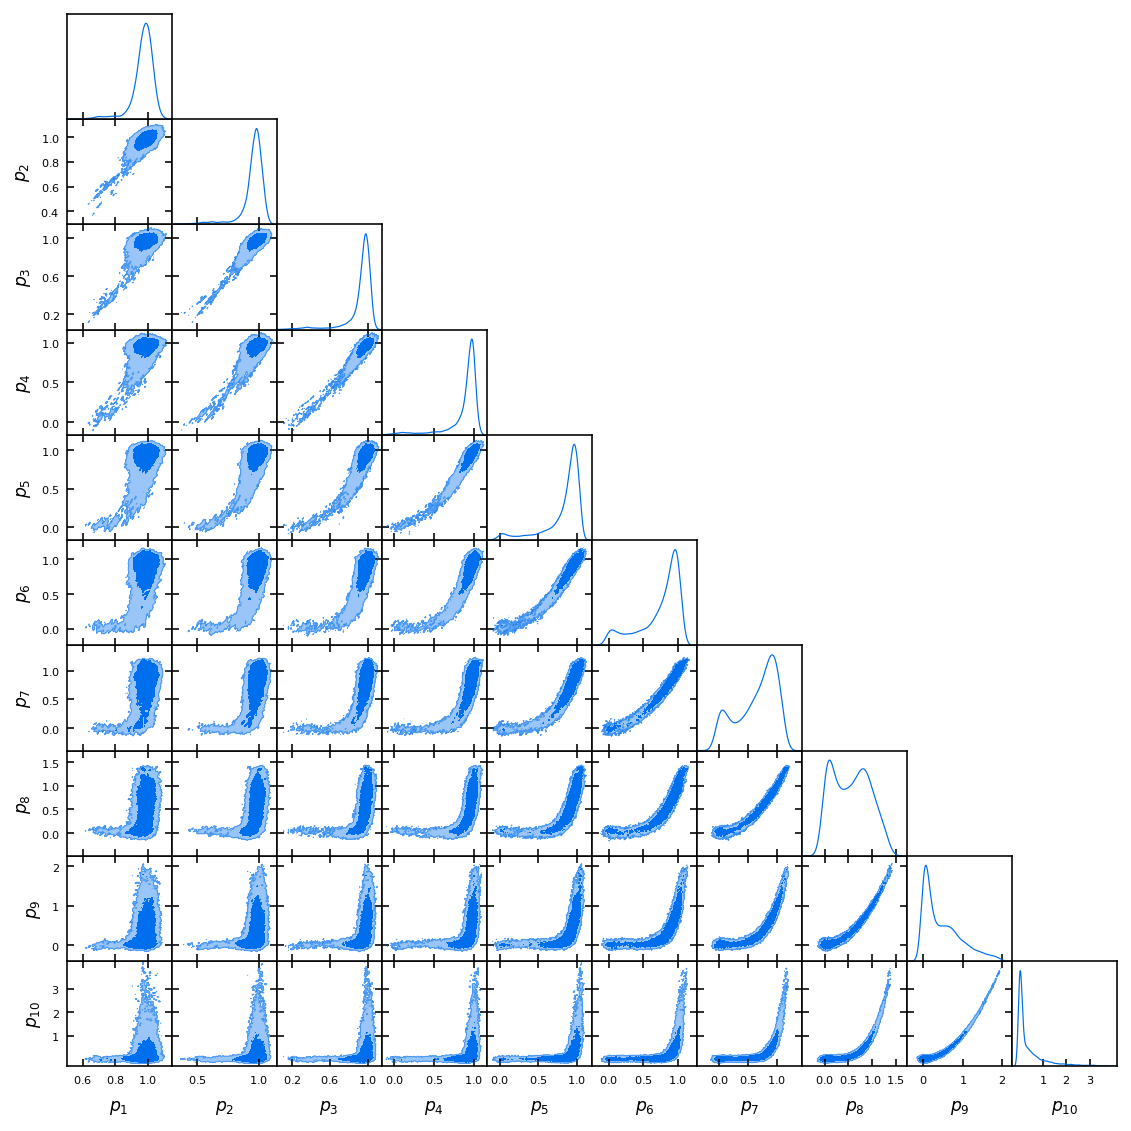

In [9]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)